## building raster readers, tight boundary extractors and density checks

In [124]:
import fiona
from shapely import geometry, wkt
from shapely.geometry import shape
from shapely.ops import transform, cascaded_union

import rasterio
from rasterio import features

import json
import geojson

from functools import partial
import pyproj
import utm

import matplotlib.pyplot as plt

%matplotlib inline

In [151]:
inputgeotiff="/mnt/bigdata/frontierSI/sampledata/raster/grid2_1m.tif"

In [152]:
dataset = rasterio.open(inputgeotiff)

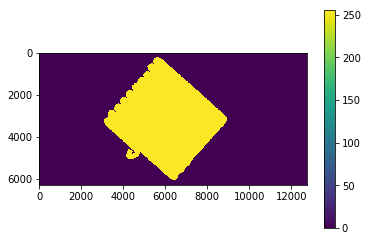

In [153]:
plt.imshow(dataset.dataset_mask())
plt.colorbar()

In [154]:
dataset.transform

Affine(1.0, 0.0, 489015.5,
       0.0, -1.0, 5627111.5)

In [155]:
dataset.dataset_mask()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [156]:
listofpolygons = []

In [157]:
boundaries = features.shapes(dataset.dataset_mask(), transform=dataset.transform)

In [158]:
for bound in boundaries:
    listofpolygons.append(shape(bound[0]))

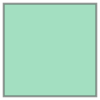

In [159]:
listofpolygons[0]

In [160]:
multipoly = cascaded_union(listofpolygons[:-1])

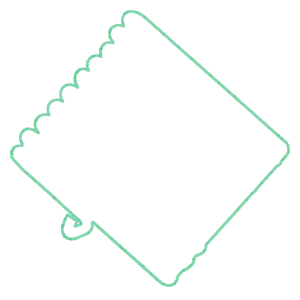

In [163]:
multipoly.boundary

In [162]:
dataset.close()